<a href="https://colab.research.google.com/github/BHANAPEESHAN/CNN_Projects_/blob/main/Cars_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
import os
os.environ['KAGGLE_USERNAME']="bhanapeeshan"
os.environ['KAGGLE_KEY']="646853511eaba7e71ae9a0d4d3c4af8a"
!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder

 99% 1.81G/1.83G [00:15<00:00, 59.2MB/s]
100% 1.83G/1.83G [00:15<00:00, 127MB/s] 


In [ ]:
from zipfile import ZipFile
file_name = "/content/stanford-car-dataset-by-classes-folder.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done Unzipping')

Done Unzipping


In [ ]:
import warnings
warnings.filterwarnings('ignore')
data_dir_list=os.listdir("/content/car_data/car_data/train")
print(data_dir_list)
path,dirs,files=next(os.walk("/content/car_data/car_data/train"))
file_count=len(files)

['Audi V8 Sedan 1994', 'Ferrari California Convertible 2012', 'Jeep Liberty SUV 2012', 'Chevrolet Corvette ZR1 2012', 'Nissan NV Passenger Van 2012', 'Lamborghini Aventador Coupe 2012', 'Infiniti QX56 SUV 2011', 'FIAT 500 Convertible 2012', 'GMC Canyon Extended Cab 2012', 'Dodge Dakota Crew Cab 2010', 'Bentley Mulsanne Sedan 2011', 'Hyundai Genesis Sedan 2012', 'Ford F-150 Regular Cab 2012', 'Bugatti Veyron 16.4 Convertible 2009', 'Plymouth Neon Coupe 1999', 'smart fortwo Convertible 2012', 'Scion xD Hatchback 2012', 'Chevrolet Silverado 1500 Classic Extended Cab 2007', 'Spyker C8 Convertible 2009', 'Dodge Challenger SRT8 2011', 'Nissan Leaf Hatchback 2012', 'Land Rover Range Rover SUV 2012', 'Dodge Sprinter Cargo Van 2009', 'Dodge Caliber Wagon 2012', 'Chevrolet Silverado 1500 Regular Cab 2012', 'Hyundai Veloster Hatchback 2012', 'Infiniti G Coupe IPL 2012', 'Mercedes-Benz E-Class Sedan 2012', 'Suzuki Kizashi Sedan 2012', 'GMC Savana Van 2012', 'Acura ZDX Hatchback 2012', 'Audi S5 Cou

In [ ]:
import os
import numpy as np
import shutil
import random
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.image import imread
import pathlib


image_folder= data_dir_list
nimgs={}

for i in image_folder:
  nimages=len(os.listdir('/content/car_data/car_data/train/'+i+'/'))
  nimgs[i]=nimages
plt.figure(figsize=(200,100))
plt.bar(range(len(nimgs)),list(nimgs.values()),align='center')
plt.xticks(range(len(nimgs)),list(nimgs.keys()))
plt.title("Distribution of classes in train",)
plt.show()

In [ ]:
Source="/content/car_data/car_data/test/"
Destination="/content/car_data/car_data/train/"
import os
import shutil

allfiles = os.listdir(Source)
  
for f in allfiles:
  for name in os.listdir(Source + f):
      shutil.move(Source + f+'/'+name, Destination + f+'/'+name)

In [ ]:
for i in image_folder:
  print("total images of {} are: ".format(i)+ str(len(os.listdir("/content/car_data/car_data/train/"+i+"/"))))

total images of Audi V8 Sedan 1994 are: 86
total images of Ferrari California Convertible 2012 are: 78
total images of Jeep Liberty SUV 2012 are: 89
total images of Chevrolet Corvette ZR1 2012 are: 93
total images of Nissan NV Passenger Van 2012 are: 77
total images of Lamborghini Aventador Coupe 2012 are: 86
total images of Infiniti QX56 SUV 2011 are: 65
total images of FIAT 500 Convertible 2012 are: 67
total images of GMC Canyon Extended Cab 2012 are: 80
total images of Dodge Dakota Crew Cab 2010 are: 82
total images of Bentley Mulsanne Sedan 2011 are: 71
total images of Hyundai Genesis Sedan 2012 are: 87
total images of Ford F-150 Regular Cab 2012 are: 85
total images of Bugatti Veyron 16.4 Convertible 2009 are: 65
total images of Plymouth Neon Coupe 1999 are: 88
total images of smart fortwo Convertible 2012 are: 80
total images of Scion xD Hatchback 2012 are: 83
total images of Chevrolet Silverado 1500 Classic Extended Cab 2007 are: 84
total images of Spyker C8 Convertible 2009 are

In [ ]:
pip install split_folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/car_data/car_data/train', output="output", seed=1337, ratio=(.9, 0.05,0.05))


Copying files: 16139 files [00:26, 602.42 files/s]


In [ ]:
for i in image_folder:
  print("test images of {} are: ".format(i)+ str(len(os.listdir("/content/output/test/"+i+"/"))))

test images of Audi V8 Sedan 1994 are: 5
test images of Ferrari California Convertible 2012 are: 5
test images of Jeep Liberty SUV 2012 are: 5
test images of Chevrolet Corvette ZR1 2012 are: 6
test images of Nissan NV Passenger Van 2012 are: 5
test images of Lamborghini Aventador Coupe 2012 are: 5
test images of Infiniti QX56 SUV 2011 are: 4
test images of FIAT 500 Convertible 2012 are: 4
test images of GMC Canyon Extended Cab 2012 are: 4
test images of Dodge Dakota Crew Cab 2010 are: 5
test images of Bentley Mulsanne Sedan 2011 are: 5
test images of Hyundai Genesis Sedan 2012 are: 5
test images of Ford F-150 Regular Cab 2012 are: 5
test images of Bugatti Veyron 16.4 Convertible 2009 are: 4
test images of Plymouth Neon Coupe 1999 are: 5
test images of smart fortwo Convertible 2012 are: 4
test images of Scion xD Hatchback 2012 are: 5
test images of Chevrolet Silverado 1500 Classic Extended Cab 2007 are: 5
test images of Spyker C8 Convertible 2009 are: 5
test images of Dodge Challenger S

In [ ]:
for i in image_folder:
  print("train images of {} are: ".format(i)+ str(len(os.listdir("/content/output/train/"+i+"/"))))

train images of Audi V8 Sedan 1994 are: 77
train images of Ferrari California Convertible 2012 are: 70
train images of Jeep Liberty SUV 2012 are: 80
train images of Chevrolet Corvette ZR1 2012 are: 83
train images of Nissan NV Passenger Van 2012 are: 69
train images of Lamborghini Aventador Coupe 2012 are: 77
train images of Infiniti QX56 SUV 2011 are: 58
train images of FIAT 500 Convertible 2012 are: 60
train images of GMC Canyon Extended Cab 2012 are: 72
train images of Dodge Dakota Crew Cab 2010 are: 73
train images of Bentley Mulsanne Sedan 2011 are: 63
train images of Hyundai Genesis Sedan 2012 are: 78
train images of Ford F-150 Regular Cab 2012 are: 76
train images of Bugatti Veyron 16.4 Convertible 2009 are: 58
train images of Plymouth Neon Coupe 1999 are: 79
train images of smart fortwo Convertible 2012 are: 72
train images of Scion xD Hatchback 2012 are: 74
train images of Chevrolet Silverado 1500 Classic Extended Cab 2007 are: 75
train images of Spyker C8 Convertible 2009 are

In [ ]:
for i in image_folder:
  print("validation images of {} are: ".format(i)+ str(len(os.listdir("/content/output/val/"+i+"/"))))

validation images of Audi V8 Sedan 1994 are: 4
validation images of Ferrari California Convertible 2012 are: 3
validation images of Jeep Liberty SUV 2012 are: 4
validation images of Chevrolet Corvette ZR1 2012 are: 4
validation images of Nissan NV Passenger Van 2012 are: 3
validation images of Lamborghini Aventador Coupe 2012 are: 4
validation images of Infiniti QX56 SUV 2011 are: 3
validation images of FIAT 500 Convertible 2012 are: 3
validation images of GMC Canyon Extended Cab 2012 are: 4
validation images of Dodge Dakota Crew Cab 2010 are: 4
validation images of Bentley Mulsanne Sedan 2011 are: 3
validation images of Hyundai Genesis Sedan 2012 are: 4
validation images of Ford F-150 Regular Cab 2012 are: 4
validation images of Bugatti Veyron 16.4 Convertible 2009 are: 3
validation images of Plymouth Neon Coupe 1999 are: 4
validation images of smart fortwo Convertible 2012 are: 4
validation images of Scion xD Hatchback 2012 are: 4
validation images of Chevrolet Silverado 1500 Classic

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
callbacks=EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='auto')    #'auto'
bestmodelfile='/content/CNN_aug_best_weights.h5'
bestmodel=ModelCheckpoint(bestmodelfile,monitor='val_acc',verbose=1,save_best_only=True)

In [ ]:
import PIL
image = PIL.Image.open("/content/car_data/car_data/train/AM General Hummer SUV 2000/00163.jpg")
width, height = image.size
print(width, height)

700 525


In [ ]:
img_width=512
img_height=512
batch_size=64

In [ ]:
TRAINING_DIR = "/content/output/train"
train_datagen=ImageDataGenerator(rescale=1/255.0)
train_gen=train_datagen.flow_from_directory(TRAINING_DIR,
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            target_size=(img_height,img_width))

Found 14441 images belonging to 196 classes.


In [ ]:
VAL_DIR = "/content/output/val"
val_datagen=ImageDataGenerator(rescale=1/255.0)
val_gen=val_datagen.flow_from_directory(VAL_DIR,
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            target_size=(img_height,img_width))

Found 725 images belonging to 196 classes.


In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), 
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    #Conv2D(128, (3, 3), activation='relu'),
    #Conv2D(128, (3, 3), activation='relu'),
    #MaxPooling2D(2, 2),
    #Dropout(0.5),
    #Conv2D(256, (3, 3), activation='relu'),
    #Conv2D(256, (3, 3), activation='relu'),
    #MaxPooling2D(2, 2),
    #Dropout(0.5),
    #Conv2D(512, (3, 3), activation='relu'),
    #Conv2D(512, (3, 3), activation='relu'),
    #MaxPooling2D(2, 2),
    #Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    #Dense(1024, activation='relu'),
    Dense(196, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 126, 126, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      1

In [ ]:
from tensorflow import optimizers
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics =['accuracy'])

In [ ]:
history = model.fit_generator(train_gen,epochs=10,verbose=1,validation_data=val_gen,callbacks=[bestmodel])

Epoch 1/10
226/226 [==============================] - 180s 792ms/step - loss: 0.0320 - accuracy: 0.0084 - val_loss: 0.0320 - val_accuracy: 0.0083
Epoch 2/10
226/226 [==============================] - 181s 800ms/step - loss: 0.0320 - accuracy: 0.0084 - val_loss: 0.0320 - val_accuracy: 0.0083
Epoch 3/10
226/226 [==============================] - 181s 801ms/step - loss: 0.0320 - accuracy: 0.0084 - val_loss: 0.0320 - val_accuracy: 0.0083
Epoch 4/10
226/226 [==============================] - 181s 799ms/step - loss: 0.0320 - accuracy: 0.0084 - val_loss: 0.0320 - val_accuracy: 0.0083
Epoch 5/10
226/226 [==============================] - 183s 809ms/step - loss: 0.0320 - accuracy: 0.0084 - val_loss: 0.0320 - val_accuracy: 0.0083
Epoch 6/10
226/226 [==============================] - 180s 797ms/step - loss: 0.0320 - accuracy: 0.0084 - val_loss: 0.0320 - val_accuracy: 0.0083
Epoch 7/10
226/226 [==============================] - 181s 801ms/step - loss: 0.0320 - accuracy: 0.0084 - val_loss: 0.0320 -

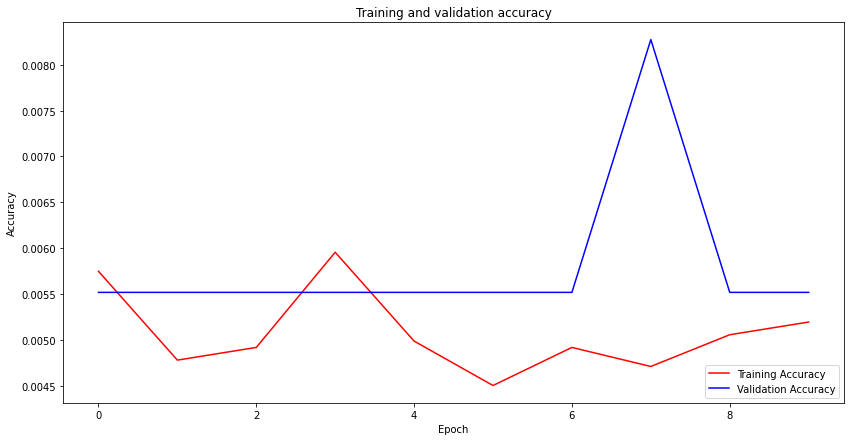

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
TEST_DIR = "/content/output/test"
test_datagen=ImageDataGenerator(rescale=1/255.0)
test_gen=train_datagen.flow_from_directory(TEST_DIR,
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            target_size=(img_height,img_width))

Found 973 images belonging to 196 classes.
